# Import Important Shtuff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import trange

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Loading Up The Data

In [5]:
import gzip
import struct

In [12]:
def load_mnist(path, kind='train'):
    if(kind == 'test'):
        kind = 't10k'

    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte')

    # Load labels
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack(">II", lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    # Load images
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8) / 255
        # print(magic, num, rows, cols)

    return images, labels

In [14]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [16]:
to_see_X, to_see_y = load_mnist('../mnist-data/', kind='train')

In [18]:
to_see_X = to_see_X.reshape(60000, 28, 28)

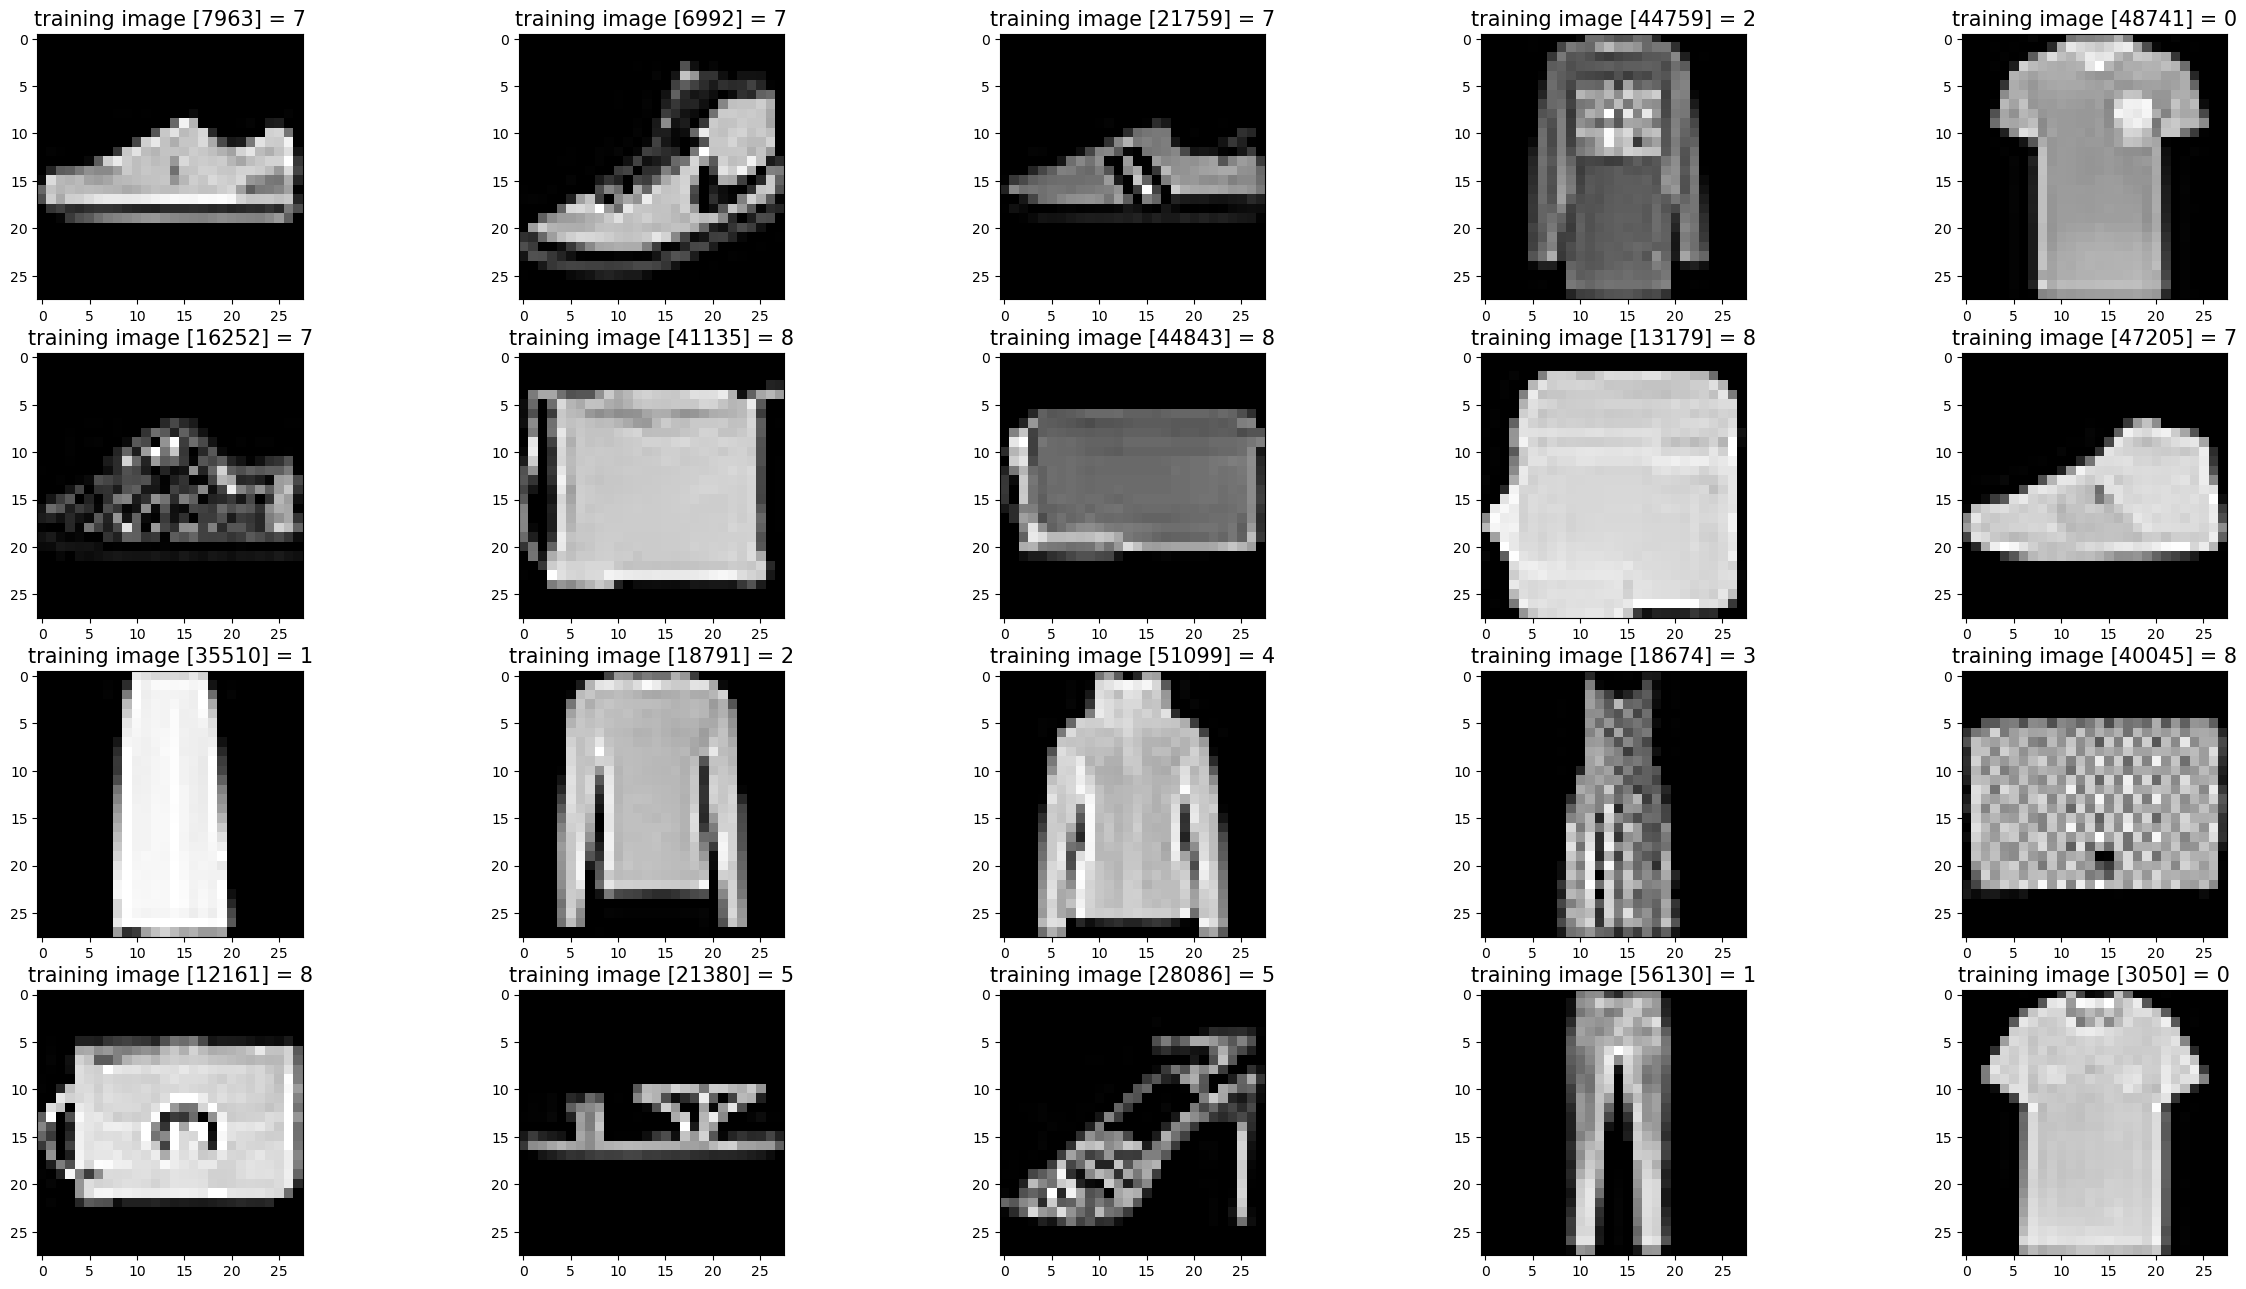

In [20]:
images_2_show = []
titles_2_show = []

for i in range(0, 20):
    r = np.random.randint(1, 60000)
    images_2_show.append(to_see_X[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(to_see_y[r]))

show_images(images_2_show, titles_2_show)

# Useful Functions

In [22]:
def create_batches(data, batch_size):
    batches = []
    for i in range(0, data.shape[0], batch_size):
        batch = data[i : i + batch_size]
        if(len(data.shape) > 1):
            batch_size, img_height, img_width = batch.shape
            batch = batch.reshape(batch_size, 1 , img_height, img_width)
        batches.append(batch)
    return np.array(batches, dtype=object)

In [23]:
def calculate_accuracy(y_pred, y_true):
    if len(y_pred.shape) == 2:
        y_pred = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred == y_true)
    return accuracy

# Training Pipeline

In [31]:
from sklearn.model_selection import train_test_split
from Model import LeNet
from utils.Optimizers import Adam

In [36]:
# Load the Data
X, y = load_mnist('../mnist-data/', kind='train')
X = X.reshape(60000, 28, 28)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=True
)

# Define Model
model = LeNet()

# Define Hyperparameters
optimizer = Adam()
learning_rate = 0.001
epochs = 10
batch_size = 64

# Create Batches
X_train_batches = create_batches(X_train, batch_size)
y_train_batches = create_batches(y_train, batch_size)

# Track Loss and Accuracy
training_loss_per_epoch = []
training_accuracy_per_epoch = []
validation_loss_per_epoch = []
validation_accuracy_per_epoch = []

# start_time = time.time()

# Training Loop
for epoch in trange(epochs, desc="Training Epochs"):
    # Training Phase
    train_epoch_loss = []
    train_epoch_accuracy = []

    batch_num = 0
    for X_batch, y_batch in zip(X_train_batches, y_train_batches):
        start_time = time.time()
        
        # forward pass
        predictions = model.forward(X_batch, y_batch)
        # calculate loss and accuracy
        train_epoch_loss.append(model.loss_activation.loss_value)
        train_epoch_accuracy.append(calculate_accuracy(predictions, y_batch))
        # backward pass
        model.backward(predictions, y_batch)
        # update params
        optimizer.pre_update_params()
        optimizer.update_params(model.conv1)
        optimizer.update_params(model.conv2)
        optimizer.update_params(model.dense1)
        optimizer.update_params(model.dense2)
        optimizer.update_params(model.dense3)
        optimizer.post_update_params()
        
        end_time = time.time()

        batch_num += 1
        print(f"time taken for batch {batch_num}: {end_time - start_time}")
    
    training_loss_per_epoch.append(np.mean(train_epoch_loss))
    training_accuracy_per_epoch.append(np.mean(train_epoch_accuracy))

    # Validation Phase
    val_prediction = model.forward(X_val, y_val)
    
    validation_loss_per_epoch.append(model.loss_activation.loss_value)
    validation_accuracy_per_epoch.append(calculate_accuracy(val_prediction, y_val))

# end_time = time.time()

Training Epochs:   0%|                                                                          | 0/10 [00:00<?, ?it/s]

time taken for batch 1: 11.920432090759277
time taken for batch 2: 9.596925258636475
time taken for batch 3: 9.350961685180664
time taken for batch 4: 9.295505285263062
time taken for batch 5: 9.283583402633667
time taken for batch 6: 9.407996892929077
time taken for batch 7: 9.053712606430054
time taken for batch 8: 9.110759258270264
time taken for batch 9: 9.536931276321411
time taken for batch 10: 9.365569829940796
time taken for batch 11: 9.607736349105835
time taken for batch 12: 9.519951343536377
time taken for batch 13: 9.22555422782898
time taken for batch 14: 9.56413221359253
time taken for batch 15: 9.514529705047607
time taken for batch 16: 9.431721448898315
time taken for batch 17: 9.65308928489685
time taken for batch 18: 9.972843408584595
time taken for batch 19: 11.303886651992798
time taken for batch 20: 9.87308931350708
time taken for batch 21: 9.69263482093811
time taken for batch 22: 9.425620794296265
time taken for batch 23: 9.464688301086426
time taken for batch 24

Training Epochs:   0%|                                                                          | 0/10 [15:08<?, ?it/s]


KeyboardInterrupt: 

#### heck this is taking wayyy too long 💀
(try training if you have a good cpu)

# Testing the Model

In [46]:
X_test, y_test = load_mnist('../mnist-data/', kind='test')
X_test = X_test.reshape(10000, 1, 28, 28)

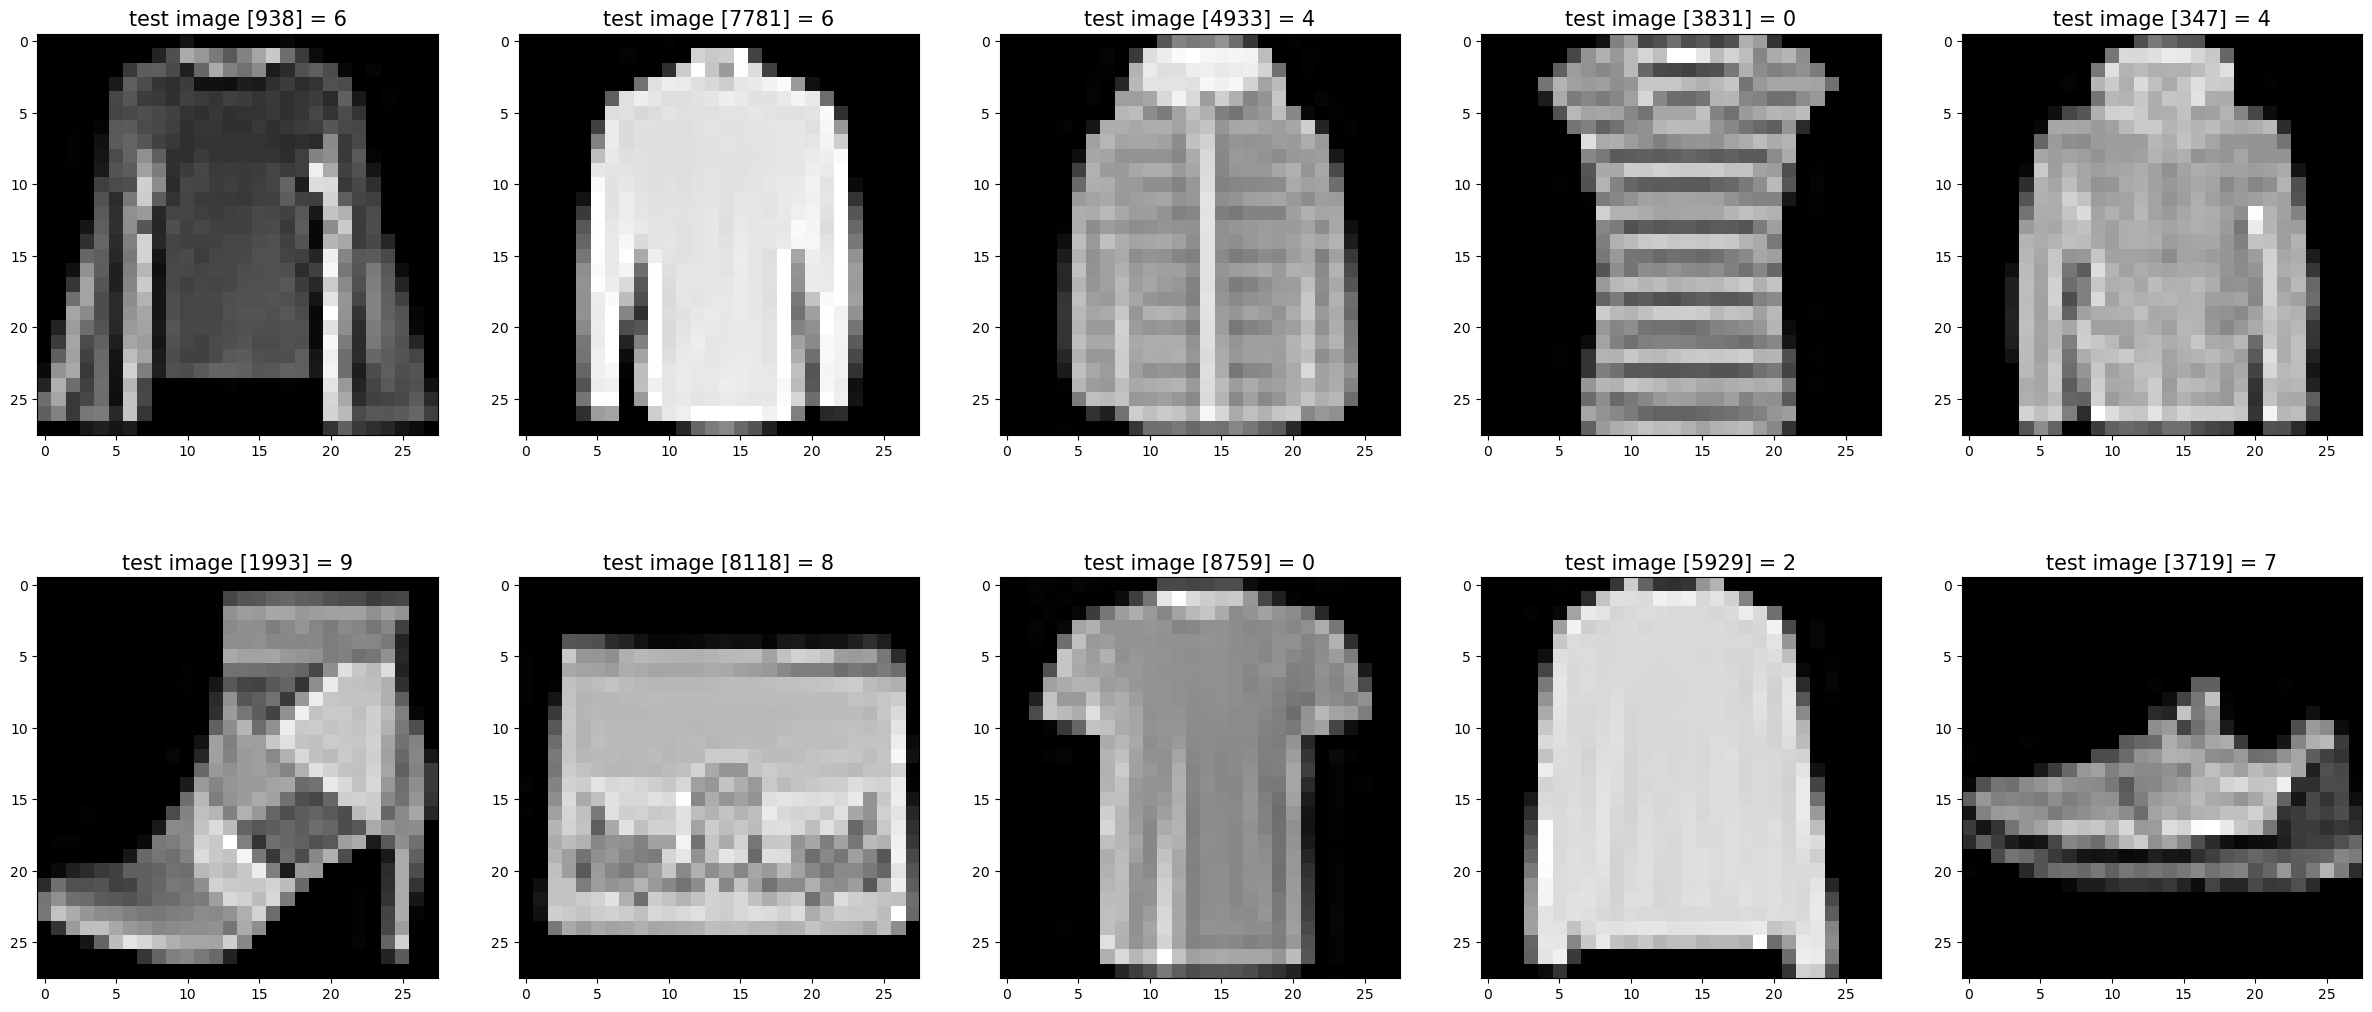

In [48]:
images_2_show = []
titles_2_show = []

for i in range(0, 10):
    r = np.random.randint(1, 10000)
    images_2_show.append(X_test.reshape(10000, 28, 28)[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

In [50]:
test_predictions = model.forward(X_test, y_test, type='test')
test_predictions = np.argmax(test_predictions, axis=1)
print(f"loss: {model.loss_activation.loss_value:.4f}")
print(f"accuracy: {calculate_accuracy(test_predictions, y_test)}")

loss: 2.2371
accuracy: 0.2378


# 💀💀💀